<a href="https://colab.research.google.com/github/cheryomukhin/BatchAI/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание рукописных цифр из набора данных MNIST с помощью Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [0]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential #НС прямого распространения
from tensorflow.keras.layers import Dense #Полносвязные слой
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [0]:
#Загрузка данных Mnist
#x_train_org - входные картинки, обучающая выбрка
#y_train_org - выходные индексы, обучающая выборка
#x_test_org - входные картинки, тестовая выбрка
#y_test_org - выходные индексы, тестовая выборка
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print('Размер обучающей выборки - картинок -', x_train_org.shape)
print('Размер обучающей выборки - верных ответов -', y_train_org.shape)
print('Размер тестовой выборки - картинок -', x_test_org.shape)
print('Размер тестовой выборки - верных ответов -', y_test_org.shape)

Размер обучающей выборки - картинок - (60000, 28, 28)
Размер обучающей выборки - верных ответов - (60000,)
Размер тестовой выборки - картинок - (10000, 28, 28)
Размер тестовой выборки - верных ответов - (10000,)


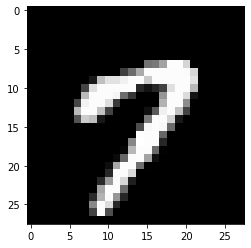

In [0]:
n = 15 #Номер картинки

#Отрисовка картинки
#Image.fromarray - создание картинки по массиву
#.convert('RGBA') - преобразование в RGBA формат
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [0]:
#Меняем формат входных картинок с 28х28 на 784х1
#Это нужно для удобства работы с полносвязным слоем (Dense)
#С двумерной картинкой мы будем работать в будущем с помощью свёрточных сетей
#Функция .reshape меняет размер массива
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

In [0]:
print('Размер обучающей выборки - картинок -', x_train.shape)
print('Размер тестовой выборки - картинок -', x_test.shape)

Размер обучающей выборки - картинок - (60000, 784)
Размер тестовой выборки - картинок - (10000, 784)


In [0]:
print(x_train[0, 300:500])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 139 253 190   2   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  11 190 253  70   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  35 241 225 160 108   1   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253
 253 119  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  45 186 253 253 150  27   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  16  93 252 253 187   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 249 253 249  64   0
   0   0]


**Нормализация данных**

In [0]:
#Нормализуем входные картинки
#НС лучше работают, если данные нормаваны от 0 до 1
#Сейчас значения во входных картинках от 0 до 255
#Надо разделить картинки на 255
#И сначала преобразовать картинки в тип float (цифры с плавающей точкой)
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255 

In [0]:
print(x_train[0, 300:500])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.54509807 0.99215686 0.74509805 0.00784314 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04313726
 0.74509805 0.99215686 0.27450982 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.13725491 0.94509804
 0.88235295 0.627451   0.42352942 0.00392157 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

**Работа с правильными ответами**

In [0]:
#Выводим пример индекса в выходных данных
print(y_train_org[n])

7


**Преобразуем метки в формат one hot encoding**

In [0]:
#НС сложно работать с чистыми индексами от 0 до 9
#Ей проще работать с данными в формате one hot encoding
#Это формат из 10 цифр - все 0 и одна 1 там, где правильный ответ
#Например
#Индекс 0 - это [1 0 0 0 0 0 0 0 0 0]
#Индекс 2 - это [0 0 1 0 0 0 0 0 0 0]
#Индекс 9 - это [0 0 0 0 0 0 0 0 0 1]
#Это делается функцией utils.to_categorical(
#Второй параметр - это количество классов, у нас - 10
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [0]:
#Выводим пример индекса в выходных данных в формате ohe
print(y_train_org[n])
print(y_train[n])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


**Правильный ответ в формате one hot encoding**

In [0]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(60000, 10)


In [0]:
#Выводим пример одного выходного вектора
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [0]:
#Создаём сеть прямого распространения
#Пока она пустая
#Подробнее на https://keras.io/models/sequential/
model = Sequential()

**Добавляем уровни сети**


In [0]:
#Добавляем в сеть полносвязные слои
#Dense - полносвязный слой, подробнее на https://keras.io/layers/core/
#Первый парамерт - количество нейронок, обычно от 2 до 2000, подбирается в ходе исследования
#input_dim - размер входного вектора, указывается только в первом слое сети
#activation - активационная функция нейронов данного слоя
#relu - одна из активационных функций, подробнее на https://keras.io/activations/
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))

#Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
#activation="softmax" - активационная функция, 
#которая делает сумму всех значений нейронов слой, равной 1
#Подробнее https://keras.io/activations/
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [0]:
#Нейронку надо "скомпилировать"
#При компиляции мы задаём несколько параметров
#loss - функция ошибки, которую оптимизирует сеть
#categorical_crossentropy - одна из функций ошибки, подходящая для классификации нескольких классов, подробнее https://keras.io/activations/
#optimizer - алгоритм обучения НС
#adam - один из алгоритмов обучения НС, подробнее https://keras.io/optimizers/
#metrics - метрика качества обучения, измеряется после каждой эпохи обучения
#accuracy - метрика, процент правильно распознанных примеров, подробнее https://keras.io/metrics/
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Вывод структуры нейронки
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_7 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [0]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка, перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выбрки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
#validation_split - процент данных, на которых сеть не обучается, на которых мы измеряем точность распознавания
model.fit(x_train, y_train, batch_size=200, epochs=20, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 22us/sample - loss: 0.2582 - acc: 0.9256 - val_loss: 0.1274 - val_acc: 0.9628
Epoch 2/20
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0888 - acc: 0.9731 - val_loss: 0.0878 - val_acc: 0.9728
Epoch 3/20
48000/48000 [==============================] - 1s 19us/sample - loss: 0.0520 - acc: 0.9841 - val_loss: 0.0985 - val_acc: 0.9698
Epoch 4/20
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0363 - acc: 0.9881 - val_loss: 0.0865 - val_acc: 0.9747
Epoch 5/20
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0247 - acc: 0.9924 - val_loss: 0.0769 - val_acc: 0.9793
Epoch 6/20
48000/48000 [==============================] - 1s 19us/sample - loss: 0.0192 - acc: 0.9934 - val_loss: 0.0906 - val_acc: 0.9747
Epoch 7/20
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0117 - acc: 0.9964 - val_loss: 0.

## Сохраняем обученную нейронную сеть

Записываем обученную нейронную сеть в файл `mnist_dense.h5`

In [0]:
#Сохраняем нейронку в файл
model.save("mnist_dense.h5")


Проверяем, что файл сохранился

In [0]:
#Выводим на экран список текущих файлов
!ls

mnist_dense.h5	sample_data


**Сохраняем файлы на локальный компьютер**

In [0]:
#Скачиваем файл локально на компьютер
files.download("mnist_dense.h5")

Если хотите использовать обученную нейронную сеть на своем компьютере:

```
from keras.models import load_model
model = load_model('mnist_dense.h5')
```

## Используем сеть для распознавания рукописных цифр

In [0]:
#Номер тестовой цифры, которую будем распознавать
n_rec = 1001

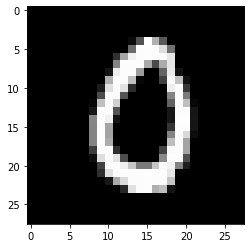

In [0]:
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

**Меняем размерность изображения и нормализуем его**

In [0]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)

(784,)


In [0]:
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массов примеров для распознавания
#Мы делаем массив из одного примеры
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


**Запускаем распознавание**

In [0]:
#Распознаём ннаш пример
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [0]:
#Выводим результат, это 10 цифр
#Сумма значений равна 1, так как финальный слой с активационной функций softmax
print(prediction)
print(prediction.shape)

[[1.0000000e+00 2.7653325e-14 1.9480432e-13 2.0369833e-18 2.7517303e-15
  4.7567765e-15 6.0519513e-11 3.8183445e-15 1.9425987e-18 1.0988106e-12]]
(1, 10)


**Преобразуем результаты из формата one hot encoding**

In [0]:
#Получаем индекс самого большого элемента
#Это итоговая цифра, которую распознала сеть
prediction = np.argmax(prediction)
print(prediction)

0


**Печатаем правильный ответ**

In [0]:
#выводим правильный ответ, для сравнения
print(y_test_org[n_rec])

0


In [0]:
pred = model.predict(x_test)

In [0]:
print(pred.shape)

(10000, 10)


In [0]:
print(pred[:10,:])

[[6.77447422e-16 2.51881144e-13 1.50728899e-15 2.21278294e-14
  1.44239553e-17 3.31805205e-17 1.09987565e-20 1.00000000e+00
  2.69137853e-18 1.70704347e-12]
 [4.41095468e-18 1.36786311e-11 1.00000000e+00 5.83028602e-21
  2.84383444e-25 1.39938846e-25 1.89955194e-20 5.85484435e-22
  6.43441697e-20 2.02155499e-26]
 [2.25798286e-12 1.00000000e+00 2.28404257e-11 2.29823464e-16
  1.77358506e-09 3.42160328e-13 2.60943385e-11 5.28627897e-09
  2.38432185e-09 3.99270359e-14]
 [1.00000000e+00 5.59387640e-14 1.65392457e-11 1.04260177e-19
  1.33541331e-13 1.10617666e-16 6.03221015e-11 2.64405417e-14
  2.20031366e-17 7.45245472e-14]
 [3.50278765e-15 7.15428803e-16 5.48657841e-15 9.25679022e-22
  1.00000000e+00 8.43883457e-20 1.80551442e-14 9.13613586e-13
  2.12814411e-20 3.68126374e-13]
 [2.04509370e-13 1.00000000e+00 8.12418438e-14 3.84599909e-17
  6.51090570e-10 3.67455863e-16 4.58457735e-14 5.48957040e-08
  4.00430210e-11 1.42323971e-15]
 [1.14944031e-14 1.17016105e-10 1.09289077e-13 1.74729895e

In [0]:
pred_arg = np.argmax(pred, axis=1)
print(pred_arg[:20])
print(y_test_org[:20])

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [0]:
true_predicted = pred_arg == y_test_org
print(true_predicted[:20])

[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True]


In [0]:
test_acc = true_predicted.sum() / true_predicted.shape[0]
print(test_acc)

0.9806


In [0]:
test_acc_ev = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.1023 - acc: 0.9806


In [0]:
print(test_acc_ev)

[0.10234338156529044, 0.9806]


## Загружаем свою картинку

In [0]:
#Загружаем файл со своей рукописной цифрой
files.upload()

Saving 9.png to 9 (1).png


{'9.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x84\x00\x00\x00\x82\x08\x02\x00\x00\x00\x08\x7f\xf7\xed\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x03\x8bIDATx^\xed\x9c\xedr\xaa@\x10D\xf5\xbe\xff;{\'5\x94Ed\x01!\xf3\xd13\xdb\xe7\x87Q\xcb\x00\xdb\x87\x99\x05$y\xbe^\xaf\x07\xc1\xe0\xdf\xf2\x93\x00@\x19@P\x06\x10\x94\x01\x04e\x00A\x19@P\x06\x10\x94\x01\x04e\x00A\x19@P\x06\x10\x94\x01\x04e\x00A\x19@P\x06\x103~\x9f\xf1|>\xf5\t\xda\xd8\xa7\xab\x8c\xb7\t@z\xca\xd8K\x1c\xd9\x84\xd0P\x86&.\x8f\xe0\xd1o\xe9&c+@\xad\x08\xcbk`ZM\xe0W\x13\xe7\x04\xee\xc5\x8d}\x1f\xad\\\x9a\xc8(\xd1\x85N)/C4\xf40!\xd4\x96\xd1F\x83Rx\x02\xf76\x11\x9fLU\x19a5\x11\x99O\xbd6\xf53E\xf4\xeaNo\x8a\xc9\x88\xd7\x10\xb9\xc6Jm\xca)\x97a\x02\xebu\x85ET\xa62\xba\xb6\xa65\x05d\x88\x06o\x13\xba\ney+\x03h\x191\xe9\xe4\nX\x03*#F\x03\x1ap2\xe6\xd4\xa0`\xc9\x98V\x83\x02$cr\x13\x02\x8a\x0cd\x13a\xdb\x96/C\x8

Проверяем загрузку картинки

In [0]:
!ls

Загружаем картинку из файла

In [0]:
#Указывает путь к файлу
img_path = '9 (1).png'
#Загружаем картинку, меняем размер на 28х28, формат на оттенки серого
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

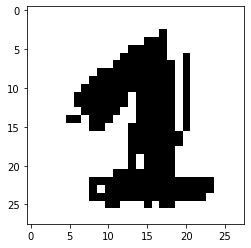

In [0]:
#Выводим картинку
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [0]:
#Преобразуем картинку в массив
x = image.img_to_array(img)
#Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
#Инвертируем изображение, нам надо белое на чёрном фоне
x = 255 - x
#Нормализуем изображение
x /= 255

Запускаем распознавание

In [0]:
#Распознаём картинку
prediction = model.predict(x)

Результаты распознавания

In [0]:
#Выводим результат
prediction

array([[6.4674197e-08, 2.3016312e-04, 2.5580352e-02, 1.7060073e-04,
        9.2450554e-11, 2.6249165e-05, 2.0347612e-08, 2.0181624e-06,
        9.7399050e-01, 4.4015227e-08]], dtype=float32)

In [0]:
#Выводим распознанную цифру
print(np.argmax(prediction))

8
